<a href="https://colab.research.google.com/github/shreytanwar/Neural-Network-Form-Scartch/blob/main/Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
class NeuralNetwork:
  
  def __init__(self, input_size, layers, output_size):
    np.random.seed(0)
    self.layers_hidden = len(layers)
    self.output_size = output_size

    model = {}
    num = 2


    #Weight and Bias vectors
    #Size of weight matrix of lth layer = (no. of neurons in (l-1)th layer * no of neurons in lth layer)
    model['W1'] = np.random.randn(input_size, layers[0])
    model['b1'] = np.zeros((1,layers[0]))

    for i in range (1, self.layers_hidden) :
      model[f'W{i+1}'] = np.random.randn(layers[i-1], layers[i])
      model[f'b{i+1}'] = np.zeros((1,layers[i]))

    model[f'W{len(layers)+1}'] = np.random.randn(layers[len(layers)-1], output_size)
    model[f'b{len(layers)+1}'] = np.zeros((1,output_size))

    self.model = model
    return
  
  def forward_propogation(self, a):
    #a is a list
    a = np.array(a)
    a = a.reshape(1,-1)

    self.model ['a0'] = a
    # 1 * (l-1)

    for i in range(1, self.layers_hidden + 2):
      weight_matrix = self.model[f'W{i}']
      # (l-1) * l
      bias_vector = self.model[f'b{i}']

      z = np.dot(self.model[f'a{i-1}'], weight_matrix) + bias_vector
      # 1 * l
      if i!=self.layers_hidden + 1:
        self.model[f'a{i}'] = self.activation(z)
      else:
        self.model[f'a{i}'] = self.softmax(z)
    
    y_ = self.model[f'a{self.layers_hidden + 1}']
    return y_
  
  def activation(self, v):
    return np.tanh(v)
  
  def loss(self, pred, y_real):
    l = -np.mean(y_real*np.log(pred))
    return l
  
  def softmax(self, v):
    ep = np.exp(v)
    ans = ep / np.sum(ep)
    return ans
  
  def back_propogation(self, pred, y_real, n = 0.01):
    delta = pred - y_real
    self.model[f'b{self.layers_hidden + 1}'] -= (n * delta)
    self.model[f'W{self.layers_hidden + 1}'] -= n * (np.dot(self.model[f'a{self.layers_hidden}'].T, delta))

    for j in range (self.layers_hidden, 0, -1):
      delta1 = np.dot(delta, self.model[f'W{j + 1}'].T) * (1 - (self.model[f'a{j}']**2))
      self.model[f'b{j}'] -= (n*delta1)
      self.model[f'W{j}'] -= n * np.dot(self.model[f'a{j-1}'].T, delta1)
      delta = delta1
    
  def predict(self, X):
    pred = []
    for i in range (X.shape[0]):
      y = self.forward_propogation(X[i])
      pred.append(np.argmax(y))
    return np.array(pred)

  def train(self, X, y_real, epochs = 50, learning_rate = 0.02):
    loss = []
    classes = self.output_size

    for i in range(epochs):
      l = 0.0
      for j in range (X.shape[0]):
        x = X[j]

        pred = self.forward_propogation(x)
        l += self.loss(pred, y_real[j])

        self.back_propogation(pred, y_real[j], learning_rate)

      l = l/X.shape[0]
      loss.append(l)
      print(f'epoch{i} loss: {l}')    
    
    return loss

In [3]:
def one_hot(y, classes):
  y_real = np.zeros((y.shape[0],classes))
  
  for i in range(y.shape[0]):
    output = y[i]
    y_real[i, output] = 1
  
  return y_real

#Testing

In [4]:
def main1():
  from sklearn.datasets import make_circles, make_classification

  X, Y = make_circles(n_samples = 500, shuffle = True, noise = 0.2, random_state = 1, factor = 0.2)
  y_real = one_hot(Y, len(np.unique(Y)))
  plt.scatter(X[:, 0], X[:, 1], c = Y)
  plt.show()

  NN = NeuralNetwork(input_size = 2, layers = [50, 2], output_size = 2)
  loss = NN.train(X, y_real, epochs = 500, learning_rate = 0.001)

  plt.plot(loss, label = 'Loss Curve')
  plt.legend()
  plt.show()
  pred = NN.predict(X)
  print("Accuracy",(np.sum(pred==Y)/X.shape[0] * 100))

  from visualize import plot_decision_boundary
  plot_decision_boundary(lambda x: NN.predict(x), X, Y)


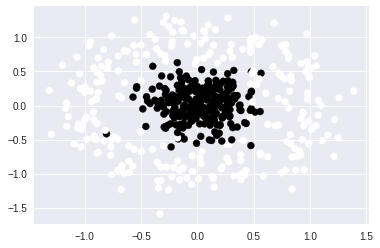

epoch0 loss: 0.34869426977735235
epoch1 loss: 0.3385131897271104
epoch2 loss: 0.329916679354788
epoch3 loss: 0.3221691312593965
epoch4 loss: 0.3151974777582582
epoch5 loss: 0.3083498687656943
epoch6 loss: 0.3009057651672286
epoch7 loss: 0.2924423815025654
epoch8 loss: 0.28297680074095083
epoch9 loss: 0.27291161374350464
epoch10 loss: 0.26288802431273395
epoch11 loss: 0.25340497516018484
epoch12 loss: 0.24463203594941313
epoch13 loss: 0.2365835643820513
epoch14 loss: 0.22922393815974443
epoch15 loss: 0.22247713235214225
epoch16 loss: 0.2162380616947028
epoch17 loss: 0.21039895718544332
epoch18 loss: 0.20486653473987462
epoch19 loss: 0.1995669306121036
epoch20 loss: 0.19444689816258648
epoch21 loss: 0.18947399243317728
epoch22 loss: 0.18463385774418908
epoch23 loss: 0.17992334489555506
epoch24 loss: 0.17534072741269188
epoch25 loss: 0.17087800874389583
epoch26 loss: 0.16652116413230114
epoch27 loss: 0.1622554125493338
epoch28 loss: 0.15806839703820427
epoch29 loss: 0.15394919477597996
ep

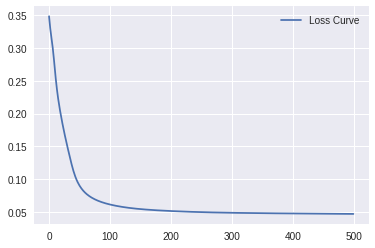

Accuracy 96.8


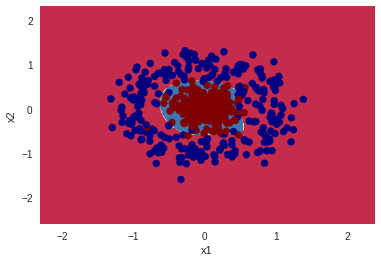

In [5]:
if __name__ == '__main__':
  main1()